# I've often wondered how many words you could make using just the letters of the Eye Chart. It sounds like a perfect task for Data Science and Python. So here we go

## A look at the Eye Chart we'll be using –<br>Invented by Dutch ophthalmologist Herman Snellen in 1862

<div>
<img src="https://m.media-amazon.com/images/I/61E6y6tsEYL._AC_SY879_.jpg" align="center" width="190" height="250">
</div>
<!-- <div>
<img src="attachment:snellen_word_chard2.jpg" align="center" width="190" height="250">
</div> -->

<!-- <div>
<img src="attachment:snellen_words_chart.jpeg" width="200" height="300" align="center">
</div> -->

### The Eye Chart letters as a set

In [1]:
snellen_set = set(['e', 'f', 'p', 't', 'o', 'z', 'l', 'p',
                     'e', 'd', 'p', 'e', 'c', 'f', 'd', 'e',
                     'd', 'f', 'c', 'z', 'p', 'f', 'e', 'l',
                     'o', 'p', 'z', 'd', 'd', 'e', 'f', 'p', 
                     'o', 't', 'e', 'c', 'l', 'e', 'f', 'o', 
                     'd', 'p', 'c', 't', 'f', 'd', 'p', 'l', 
                     't', 'c', 'e', 'o', 'p', 'e', 'z', 'o',
                     'l', 'c', 'f', 't', 'd'])
snellen_set = list(snellen_set)
len(snellen_set)

9

### As a list

In [2]:
snellen_list = ['e', 'f', 'p', 't', 'o', 'z', 'l', 'p',
                     'e', 'd', 'p', 'e', 'c', 'f', 'd', 'e',
                     'd', 'f', 'c', 'z', 'p', 'f', 'e', 'l',
                     'o', 'p', 'z', 'd', 'd', 'e', 'f', 'p', 
                     'o', 't', 'e', 'c', 'l', 'e', 'f', 'o', 
                     'd', 'p', 'c', 't', 'f', 'd', 'p', 'l', 
                     't', 'c', 'e', 'o', 'p', 'e', 'z', 'o',
                     'l', 'c', 'f', 't', 'd']
len(snellen_list)

61

Making a class that get's rid of curly brackets when printing out our set of Letters

In [3]:
class sset(set):
    def __str__(self):
        return ', '.join([str(i) for i in self])

In [4]:
amount = len(sset(snellen_set))
chart_lenght = len(snellen_list)
print(f'There are only {amount} unique letters on the Eye Chart')
print(f'And there are {chart_lenght} total letters  on the Chart')

There are only 9 unique letters on the Eye Chart
And there are 61 total letters  on the Chart


#### Since the letters appear on the Eye Chart as block letters<br> let's convert them to upper case in our output

In [5]:
for i in range(len(snellen_set)):
    snellen_set[i] = snellen_set[i].upper()

In [6]:
print(f'The letters that appear on the Snellen Test Card are: {sset(snellen_set)}')

The letters that appear on the Snellen Test Card are: P, C, F, D, E, O, T, Z, L


## Let's count how many times each letter shows up on the card

#### Making the letters upper case for our count output

In [7]:
for i in range(len(snellen_list)):
    snellen_list[i] = snellen_list[i].upper()

In [8]:
from collections import Counter

amount = Counter(snellen_list)

print("Here's how frequently each letter appears on the test card")
amount.most_common()

Here's how frequently each letter appears on the test card


[('E', 10),
 ('P', 9),
 ('F', 8),
 ('D', 8),
 ('O', 6),
 ('C', 6),
 ('T', 5),
 ('L', 5),
 ('Z', 4)]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

## Bringing in the NLTK Corpus

In [10]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/nathanwalter/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
from nltk.corpus import words
word_list = words.words()
length_nltk = (len(word_list))

print(f"There are {length_nltk:,} words for us to reference in nltk")

There are 236,736 words for us to reference in nltk


# Using Trie to create a list of eye chart words from NLTK 

In [12]:
trie = {}

for word in word_list:
    cur = trie
    for l in word:
        cur  = cur.setdefault(l, {})
        cur['word'] = True # defined if this node indicates a complete word
        
def findWords(word, trie = trie, cur = '', word_list = []):
    for i, letter in enumerate(word):
        if letter in trie:
            if 'word' in trie[letter]:
                word_list.append(cur + letter)
            findWords(word, trie[letter], cur+letter, word_list )    
            # first example: findWords(word[:i] + word[i+1:], trie[letter], cur+letter, word_list )

    return word_list

words_longer = findWords("epfdoctlz")

In [13]:
longer_list = []

for word in words_longer:
    if len(word) > 1:
        longer_list.append(word)
print(longer_list[:400]) 

['ee', 'eel', 'eele', 'eelp', 'eelpo', 'eelpot', 'eelf', 'eelc', 'eell', 'ep', 'epe', 'epee', 'epep', 'epepo', 'epepop', 'eped', 'epo', 'epop', 'epope', 'epopee', 'epopo', 'epopoe', 'epopt', 'epopte', 'epod', 'epode', 'epoo', 'epoop', 'epoc', 'epol', 'epoll', 'ef', 'eff', 'effe', 'effec', 'effect', 'effecte', 'effectf', 'effecto', 'effectl', 'effectle', 'effet', 'effete', 'effo', 'effod', 'effl', 'efflo', 'efo', 'efol', 'eft', 'efte', 'efl', 'ed', 'ede', 'edeo', 'edeod', 'edeot', 'edeoto', 'edeol', 'edeolo', 'edel', 'edd', 'edde', 'eddo', 'eo', 'eop', 'eol', 'eoz', 'eozo', 'eozoo', 'ec', 'ece', 'ecp', 'ecd', 'ecde', 'eco', 'ecop', 'ecot', 'ecoto', 'ecol', 'ecole', 'ecolo', 'ecc', 'ecce', 'ecco', 'eccop', 'eccl', 'eccle', 'ect', 'ecte', 'ectep', 'ectet', 'ecto', 'ectoe', 'ectoet', 'ectop', 'ectopt', 'ectopte', 'ectopl', 'ectod', 'ectode', 'ectoc', 'ectoco', 'ectocoe', 'ectocoel', 'ectot', 'ectoto', 'ectol', 'ectole', 'ectolec', 'ectolo', 'ectolop', 'ectoz', 'ectozo', 'ectozoo', 'ecl', '

In [14]:
word_list_length = len(longer_list)
print(f""" The trie approach to finding words formed from letters of the eye chart 
using nltk, returns{word_list_length: ,} words. But, if you look closely, you'll see that it
is comprised of mostly fragments of full English words. Let's try to improve upon this.""")

 The trie approach to finding words formed from letters of the eye chart 
using nltk, returns 1,722 words. But, if you look closely, you'll see that it
is comprised of mostly fragments of full English words. Let's try to improve upon this.


# Let's use the trie with another word list and call it words3

In [15]:
# Find the words3 word list here:  svnweb.freebsd.org/base/head/share/dict/web2?view=co

trie = {}

with open('/Users/nathanwalter/jobsearch/Eye-Chart-Words/Data/web2.txt') as words3:


    for word in words3:
        cur = trie
        for l in word:
            cur  = cur.setdefault(l, {})
            cur['word'] = True # defined if this node indicates a complete word
        
def findWords(word, trie = trie, cur = '', words3 = []):
    for i, letter in enumerate(word):
        if letter in trie:
            if 'word' in trie[letter]:
                words3.append(cur)
            findWords(word, trie[letter], cur+letter, words3 )    
            # first example: findWords(word[:i] + word[i+1:], trie[letter], cur+letter, word_list )

    return [word for word in words3 if word in words3]

words3 = findWords("epfdoctlz")

In [16]:
third_list = []

for word in words3:
    if len(word) > 1:
        third_list.append(word)
third_list = set(third_list)   
third_list = list(third_list)
print(sorted(third_list[:400]))

['cele', 'celle', 'cellep', 'celot', 'cep', 'ceto', 'cetol', 'cetot', 'cetoto', 'cle', 'cled', 'cleft', 'clet', 'clod', 'clodd', 'clodl', 'clodp', 'clodpo', 'cloo', 'clott', 'cocc', 'cocco', 'coco', 'cocot', 'cocott', 'cocoze', 'cocozell', 'codef', 'coe', 'coef', 'coeffe', 'coeffec', 'coeld', 'coele', 'coelo', 'cofe', 'cofeo', 'cofeoffe', 'coff', 'coffee', 'coffl', 'col', 'colc', 'colep', 'colle', 'collect', 'collecte', 'collet', 'collop', 'coloc', 'coloce', 'coloco', 'colopt', 'colot', 'colpo', 'colpoc', 'colpoce', 'colpop', 'coo', 'cood', 'coodl', 'cooe', 'cool', 'cootfo', 'cop', 'cope', 'coplo', 'coplot', 'coplott', 'copo', 'copp', 'cotel', 'cotell', 'cotte', 'ct', 'de', 'dec', 'decl', 'decod', 'ded', 'dedec', 'dedo', 'deed', 'deede', 'defec', 'defectl', 'defectol', 'defle', 'deflec', 'deflect', 'defloc', 'defo', 'defoe', 'deft', 'del', 'delec', 'delet', 'delt', 'deod', 'dep', 'depeo', 'depet', 'depl', 'depo', 'detec', 'detect', 'dodd', 'dodde', 'doddl', 'dode', 'dol', 'dolld', 'doo

In [17]:
words3_length = len(third_list)
print(f""" Words3 which uses a different list of words than NLTK,
returns {words3_length} words from the eye chart. 
However, upon closer inspection, most of these are the repeating beginnings of words. 
This is not the result we are looking for.""")

 Words3 which uses a different list of words than NLTK,
returns 931 words from the eye chart. 
However, upon closer inspection, most of these are the repeating beginnings of words. 
This is not the result we are looking for.


# Shifting away from trie for now

## Switching to Enchant

In [18]:
# uncomment below if you don't have enchant installed already
#!pip install pyenchant

In [19]:
from itertools import permutations
import enchant

In [20]:
# https://www.youtube.com/watch?v=nLWi-2b_OjE

d = enchant.Dict("en_US")
op = set()

inp = "epfdoctlz"
letter = [x.lower() for x in inp]

def enchanted_snellen(inp):
    for n in range(len(inp)):
        for y in list(permutations(letter, n)):
            z = ''.join(y)
            if len(z) > 1:
                if d.check(z):
                    op.add(z)
    return list(op)
enchant_snellen = enchanted_snellen(inp)

In [21]:
print(sorted(enchant_snellen))

['cf', 'cl', 'clef', 'cleft', 'clod', 'clop', 'clot', 'co', 'cod', 'code', 'coed', 'col', 'cold', 'colt', 'cop', 'cope', 'coped', 'cot', 'cote', 'cpd', 'cpl', 'ct', 'dc', 'def', 'deft', 'delft', 'depot', 'dept', 'do', 'doc', 'doe', 'dole', 'dolt', 'dope', 'dot', 'dote', 'doz', 'doze', 'dpt', 'dz', 'ecol', 'ed', 'elf', 'etc', 'fed', 'felt', 'fez', 'fl', 'fled', 'floe', 'flop', 'flt', 'foe', 'fol', 'fold', 'fop', 'ft', 'ftp', 'led', 'left', 'let', 'lo', 'lode', 'loft', 'lofted', 'lop', 'lope', 'loped', 'lot', 'ltd', 'ode', 'of', 'oft', 'old', 'ole', 'op', 'ope', 'oped', 'opt', 'opted', 'oz', 'pct', 'pd', 'pelf', 'pelt', 'pet', 'pf', 'pl', 'plod', 'plot', 'pod', 'poet', 'pol', 'pole', 'poled', 'pot', 'pt', 'ted', 'tel', 'to', 'toe', 'toed', 'told', 'tole', 'top', 'zed']


In [22]:
enchant_length = len(enchant_snellen)
print(f""" Enchant prints out a beautiful list of full English words. 
It is only {enchant_length} words long, though. I think it can be
improve upon.""")

 Enchant prints out a beautiful list of full English words. 
It is only 106 words long, though. I think it can be
improve upon.


# For loop with Break using NLTK word list

In [23]:
word_list = word_list
pattern = 'epfdoctlz'

def snellen_words(pattern, word_list):
    ans = []
    for word in word_list:
        find = True
        for letter in word:
            if letter not in pattern:
                find = False
                break
        if find == True and len(word) > 1:
            ans.append(word)
    return ans


chart_words = list(snellen_words(pattern, word_list))
print(chart_words)

['ce', 'cede', 'cee', 'cell', 'celled', 'cello', 'celt', 'cep', 'cepe', 'cled', 'clee', 'clef', 'cleft', 'clefted', 'clep', 'clod', 'clodlet', 'clodpoll', 'cloff', 'cloof', 'cloop', 'cloot', 'clop', 'clot', 'clote', 'cocco', 'coco', 'cocotte', 'cocozelle', 'cod', 'coddle', 'code', 'codo', 'codol', 'coe', 'coed', 'coeffect', 'coelect', 'cofeoffee', 'coff', 'coffee', 'coffeepot', 'coffle', 'coft', 'col', 'cold', 'cole', 'coll', 'collect', 'collected', 'collet', 'collop', 'colloped', 'colp', 'colpeo', 'colpocele', 'colt', 'coo', 'coodle', 'cooee', 'coof', 'cool', 'coop', 'coot', 'cootfoot', 'cop', 'cope', 'copepod', 'copped', 'coppet', 'copple', 'coppled', 'cot', 'cote', 'coto', 'cotte', 'cotted', 'coz', 'coze', 'de', 'decoct', 'decode', 'decollete', 'dedo', 'dee', 'deed', 'deedeed', 'deep', 'defect', 'deflect', 'deflected', 'deft', 'dele', 'delete', 'delf', 'delft', 'dell', 'depeople', 'deplete', 'depot', 'detect', 'do', 'doc', 'dod', 'dodd', 'dodded', 'doddle', 'dodlet', 'dodo', 'doe', 

In [24]:
total = len(chart_words)
print(f""" When filtering for words containing 2 or more letters,
we are presented with {total} English words formed 
by the Eye Chart letters. 
 Although, not as large a number as some of the above examples,
the break statement ensures that we don't return anything unless it is
a complete word in the nltk word list.""")

 When filtering for words containing 2 or more letters,
we are presented with 404 English words formed 
by the Eye Chart letters. 
 Although, not as large a number as some of the above examples,
the break statement ensures that we don't return anything unless it is
a complete word in the nltk word list.


In [25]:
longest_word = max(chart_words, key=len)
print(f"""The longest word in the current list is {longest_word} and is {len(longest_word)} letters long!""")

The longest word in the current list is toodleloodle and is 12 letters long!


I looked up the definition of toodleloodle, but couldn't find anything<br>
that resembled a definition. So We'll locate the second longest word

In [26]:
second_longest = sorted(chart_words, key=len)[-2]
second_length = len(second_longest)
print(f"""The second longest word is in fact a real word and the word is {second_longest}
It is {second_length} letters long
According to Merriam-Webster: It's an adjective, meaning – clubfoot or having a clubfoot""")

The second longest word is in fact a real word and the word is poltfooted
It is 10 letters long
According to Merriam-Webster: It's an adjective, meaning – clubfoot or having a clubfoot


##### It may be helpful to have a function that prints out the longer words of the chart_words list

In [27]:
def get_lengthy_words(n):
    words_length = sorted(chart_words, key=len)[-n]
    length_of_words = len(words_length)
    print(f"""{words_length} is a real-life word.
    It is {length_of_words} letters long""")

In [28]:
get_lengthy_words(6)
get_lengthy_words(5)

colpocele is a real-life word.
    It is 9 letters long
decollete is a real-life word.
    It is 9 letters long


##### Now let's get a look at the 50 longest words, in case we need to impress people at parties

In [29]:
long_chart_words = sorted(chart_words, reverse=True, key=len)[1:51]
print(long_chart_words)

['poltfooted', 'cocozelle', 'cofeoffee', 'coffeepot', 'collected', 'colpocele', 'decollete', 'deflected', 'opodeldoc', 'clodpoll', 'coeffect', 'colloped', 'cootfoot', 'depeople', 'floodlet', 'locofoco', 'octopede', 'pelleted', 'poltfoot', 'telecode', 'clefted', 'clodlet', 'cocotte', 'coelect', 'collect', 'copepod', 'coppled', 'deedeed', 'deflect', 'deplete', 'dozzled', 'electee', 'feoffee', 'fleeced', 'flooded', 'looplet', 'octoped', 'octopod', 'peoplet', 'pleopod', 'plotted', 'pottled', 'zoccolo', 'celled', 'coddle', 'coffee', 'coffle', 'collet', 'collop', 'colpeo']


### Let's see what the enchant list and the chart_words list have in common

In [30]:
# Find common elements of set and list
enchant_as_set = set(enchant_snellen)
intersection = enchant_as_set.intersection(chart_words)

intersection_as_list = list(intersection)

print(intersection_as_list)

['ode', 'dope', 'led', 'left', 'let', 'zed', 'coed', 'clod', 'pol', 'old', 'col', 'doc', 'do', 'felt', 'pole', 'doze', 'clop', 'plot', 'cot', 'pelf', 'doe', 'cold', 'cod', 'cope', 'deft', 'lop', 'lode', 'fled', 'oft', 'told', 'pelt', 'elf', 'dolt', 'tole', 'lope', 'code', 'clot', 'cleft', 'floe', 'pod', 'loft', 'pet', 'delft', 'depot', 'cop', 'poet', 'dote', 'dole', 'pot', 'plod', 'ted', 'dot', 'fold', 'fop', 'lot', 'flop', 'to', 'opt', 'toed', 'fez', 'lo', 'ope', 'top', 'colt', 'clef', 'cote', 'foe', 'toe', 'of', 'fed']


In [31]:
intersected = len(intersection_as_list)
enchant_length = len(enchant_snellen)

print(f""" There are {intersected} words in common between the enchant list and the chart_words list,
which means there are {len(enchant_snellen) - len(intersection_as_list)} words in the enchant list
that are not in the larger chart_words list""")

 There are 70 words in common between the enchant list and the chart_words list,
which means there are 36 words in the enchant list
that are not in the larger chart_words list


#### Out of curiosity, what words are in the enchant list that aren't in chart_words

In [32]:
chart_as_set = set(chart_words)

only_in_enchant = list(set(enchant_snellen) - set(chart_words))
print(only_in_enchant)

['poled', 'pd', 'pf', 'ftp', 'pt', 'cpl', 'coped', 'tel', 'oped', 'pct', 'ed', 'etc', 'opted', 'def', 'flt', 'doz', 'ltd', 'ecol', 'ft', 'ole', 'fl', 'dept', 'loped', 'op', 'co', 'lofted', 'ct', 'dc', 'pl', 'dpt', 'fol', 'cl', 'oz', 'dz', 'cpd', 'cf']


In [33]:
len(only_in_enchant)

36

#### I'd say there are a few real words in there. Maybe we can add them to the chart_words list somehow

# Let's get these puppies into a dataframe

## Using the chart_words list we'll make a Series (a 1–dimensional array)

In [34]:
import pandas as pd

lists = {'nltk': chart_words, 'enchant': only_in_enchant}


df = pd.DataFrame([(k,e,len(e)) for k,l in lists.items() for e in l],
                  columns=['source', 'word', 'length'])

df = pd.DataFrame(chart_words, columns=["words"], dtype= str)
df.tail()

,words
399,old
400,pot
401,to
402,toe
403,top


In [35]:
df_len = len(df)
print(f"There are {df_len} rows in the dataframe")

There are 404 rows in the dataframe


# Adding a Length Column

## In order to make a column that has the length of each word<br>we'll need to first create a function, then we can use the .apply( )<br>method to make our new column

#### making the function to get the length of each word

In [36]:
def word_length(word):
    return len(word)
    

#### Okay now, let's use the .apply( ) method to make the column

In [37]:
def word_length(word):
    return len(word)

df['length'] = df['words'].apply(word_length)

## Great, now we have a column describing the length of each word<br> and we officially have a dataframe of Eye Chart Words (a 2-Dimensional array)

In [38]:
df.head(10)
# print out of first ten words and their length

,words,length
0,ce,2
1,cede,4
2,cee,3
3,cell,4
4,celled,6
5,cello,5
6,celt,4
7,cep,3
8,cepe,4
9,cled,4


# That DataFrame is lovely, but I think we need a way<br>of being able to add new words to it while keeping track of where the words came from

## Making a new DF called data, which will add the enchant words that<br> weren't in chart_words already

In [39]:
lists = {'nltk': chart_words, 'enchant': only_in_enchant}

data = pd.DataFrame([(k,e,len(e)) for k,l in lists.items() for e in l],
                  columns=['source', 'word', 'length'])

In [40]:
data.iloc[300:315]

,source,word,length
300,nltk,poltfooted,10
301,nltk,poodle,6
302,nltk,poof,4
303,nltk,pool,4
304,nltk,poop,4
305,nltk,pooped,6
306,nltk,poot,4
307,nltk,pop,3
308,nltk,pope,4
309,nltk,poppel,6


Let's see if the enchant words are in the dataframe under list_2

In [41]:
data.tail()

,source,word,length
435,enchant,cl,2
436,enchant,oz,2
437,enchant,dz,2
438,enchant,cpd,3
439,enchant,cf,2


There they are. Good

# Wiki top 100 thousand words

In [42]:
# Go here to find the wiki-100k.txt word list: https://gist.github.com/h3xx/1976236

with open('/Users/nathanwalter/jobsearch/Eye-Chart-Words/Data/large_words/wiki-100k.txt') as wiki: 
    wiki = list(wiki)

## Let's have a look at the Wiki list of 100,000 words

In [43]:
wiki[:30]

['#!comment: This is a list of the top 100,000 most frequently-used English words\n',
 '#!comment: according to Wiktionary.\n',
 '#!comment:\n',
 '#!comment: It was compiled in August 2005 and coalesced into a handy list for\n',
 '#!comment: use in John the Ripper.\n',
 '#!comment:\n',
 '#!comment:\n',
 '#!comment: Pull date: Sun Jan 15 22:03:54 2012 GMT\n',
 '#!comment:\n',
 '#!comment: Sources:\n',
 '#!comment:\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists#Top_English_words_lists\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/1-10000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/10001-20000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/20001-30000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/30001-40000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/40001-50000\n',


### Looks like there is some extra stuff in there besides English words

In [44]:
import re
import numpy as np

reading in the wiki list to pandas DataFrame to start cleaning

In [45]:
wiki_df = pd.DataFrame(wiki, columns=['words'], dtype=str)
wiki_df.head()

,words
0,"#!comment: This is a list of the top 100,000 m..."
1,#!comment: according to Wiktionary.\n
2,#!comment:\n
3,#!comment: It was compiled in August 2005 and ...
4,#!comment: use in John the Ripper.\n


Print outs of the beginning and end of the DataFrame (technically a series)

In [46]:
wiki_df.tail()

,words
99923,ära\n
99924,égoïste\n
99925,AGE\n
99926,Ack\n
99927,Apennine


### Finding all the rows with those pesky hashtags and exclamation marks

In [47]:
print(wiki_df[wiki_df.words.str.contains(r'[@#&$%+-/*]')])

                                                   words
0      #!comment: This is a list of the top 100,000 m...
1                  #!comment: according to Wiktionary.\n
2                                           #!comment:\n
3      #!comment: It was compiled in August 2005 and ...
4                   #!comment: use in John the Ripper.\n
...                                                  ...
99625                         #!comment: 99701 - 99800\n
99685                                   compuserve.com\n
99726                         #!comment: 99801 - 99900\n
99827                        #!comment: 99901 - 100000\n
99881                                           left.'\n

[1544 rows x 1 columns]


## Dropping all rows that were found to have non-English characters

In [48]:
wiki_df.drop(wiki_df[wiki_df['words'].str.contains(r'[@#&$%+-/*]')].index, inplace=True)

In [49]:
wiki_df

,words
26,the\n
27,of\n
28,and\n
29,to\n
30,a\n
...,...
99923,ära\n
99924,égoïste\n
99925,AGE\n
99926,Ack\n


### There are some foreign words left, but our pattern of letters<br>from the eye chart will filter them out for us

Removing the new line symbols (\n) from our words 

In [50]:
wiki_df['words'] = wiki_df['words'].str.replace("\n", "")

#### Just to be certain we'll write out a little lambda function to<br>ensure all our words are lower case

In [51]:
wiki_df['words'] = wiki_df['words'].apply(lambda x : x.lower())

### Now we'll turn that Pandas DataFrame back into a list so we can<br>do some work with it

In [52]:
vals = wiki_df['words']
wiki_list = vals.tolist()

## Using our function from above, the one with the break statement,<br>we'll find all the words in our wiki list of 100,000 that contain only letters<br>from the Eye Chart. Pretty cool, huh?

In [53]:
pattern = 'epfdoctlz'
words_list = wiki_list

wiki_words = snellen_words(pattern, wiki_list)
print(wiki_words[:400])
print(len(wiki_words))

['of', 'to', 'de', 'do', 'et', 'old', 'le', 'too', 'people', 'def', 'to', 'left', 'off', 'tell', 'told', 'let', 'of', 'felt', 'tt', 'of', 'feet', 'ce', 'feel', 'fell', 'do', 'deep', 'let', 'cold', 'led', 'el', 'effect', 'to', 'elle', 'te', 'fld', 'cd', 'col', 'cette', 'foot', 'de', 'le', 'etc', 'food', 'top', 'fee', 'do', 'et', 'del', 'lot', 'old', 'people', 'op', 'poet', 'too', 'lo', 'fool', 'to', 'det', 'elle', 'tell', 'off', 'cool', 'of', 'feet', 'fled', 'fleet', 'co', 'ce', 'pp', 'pope', 'people', 'collected', 'odd', 'cf', 'cet', 'deed', 'coffee', 'tot', 'de', 'cf', 'ed', 'feed', 'zo', 'defect', 'elected', 'fed', 'el', 'flood', 'lee', 'left', 'zoo', 'plot', 'foe', 'folded', 'effect', 'ete', 'oft', 'ze', 'old', 'ole', 'effected', 'defect', 'pl', 'celle', 'collect', 'elect', 'cette', 'pot', 'cell', 'cold', 'food', 'too', 'foot', 'effet', 'pool', 'ett', 'pole', 'todo', 'code', 'ftp', 'detected', 'dec', 'tell', 'oct', 'deze', 'tete', 'det', 'toe', 'fold', 'pet', 'of', 'ed', 'lo', 'doe'

In [54]:
wiki_len = len(wiki_words)
print(f""" There are {wiki_len} words made soley from the letters of the Snellen Card 
in our list of 100,000 most popular wiki words.""")

 There are 771 words made soley from the letters of the Snellen Card 
in our list of 100,000 most popular wiki words.


### Let's see how the wiki Eye Chart words compare to the nltk eye chart words

In [55]:
# Find common elements of set and list
wiki_as_set = set(wiki_words)
intersection = wiki_as_set.intersection(set(chart_words))

intersection_as_list2 = list(intersection)


print(intersection_as_list2)

['coffee', 'pop', 'loop', 'foot', 'coco', 'pete', 'loo', 'pole', 'petted', 'topple', 'zoo', 'collected', 'toot', 'poll', 'tepee', 'delete', 'oft', 'coo', 'toll', 'dodd', 'polo', 'plotted', 'dolt', 'collect', 'leed', 'tole', 'poodle', 'toddle', 'dell', 'too', 'loft', 'delft', 'fee', 'ted', 'dot', 'fold', 'eft', 'deflected', 'lo', 'doff', 'ooze', 'colt', 'toe', 'topped', 'tool', 'fed', 'ode', 'eel', 'pol', 'elle', 'toto', 'effect', 'tope', 'felt', 'tee', 'feed', 'pope', 'effete', 'doe', 'cope', 'deflect', 'flood', 'cede', 'coop', 'tell', 'fled', 'food', 'lode', 'fleet', 'fool', 'off', 'epee', 'fleece', 'coffle', 'code', 'zee', 'cop', 'dole', 'cool', 'lot', 'fet', 'opt', 'flee', 'otto', 'poe', 'top', 'dozed', 'eld', 'pell', 'coe', 'pott', 'loco', 'let', 'led', 'odd', 'dodo', 'lee', 'clod', 'feel', 'pellet', 'coot', 'peeled', 'loll', 'doc', 'de', 'plot', 'tod', 'flooded', 'pelf', 'cold', 'fe', 'tot', 'loot', 'deft', 'pool', 'celt', 'flot', 'elf', 'dotted', 'od', 'floe', 'pod', 'cleft', 'de

In [56]:
intersect2 = len(intersection_as_list2)
wiki_length = len(wiki_as_set)

print(f""" Thre are {len(intersection_as_list2)} words in common between 
the wiki snellen words and the nltk snellen words. This also means that there are 
{wiki_length - intersect2} words in the wiki eye chart words that aren't in the 
nltk eye chart words.""")

 Thre are 193 words in common between 
the wiki snellen words and the nltk snellen words. This also means that there are 
235 words in the wiki eye chart words that aren't in the 
nltk eye chart words.


## Here's the list of Wiki Eye Chart words which are different<br>than anything we've seen so far

In [57]:
only_in_wiki = list(set(wiki_words) - set(chart_words))
print(only_in_wiki)

['fete', 'olette', 'doet', 'zette', 'clo', 'eccl', 'oc', 'tel', 'popped', 'tolled', 'et', 'peopled', 'zettel', 'le', 'ed', 'pett', 'detto', 'defoe', 'lopped', 'folle', 'cel', 'dopo', 'todo', 'deel', 'fo', 'cd', 'feted', 'letto', 'cet', 'dec', 'petto', 'colpo', 'foco', 'felled', 'ello', 'ff', 'fl', 'eo', 'edel', 'loopt', 'op', 'dezelfde', 'fel', 'ette', 'dood', 'clotted', 'zet', 'odo', 'coote', 'eletto', 'loc', 'dp', 'ccc', 'felde', 'effected', 'doled', 'colle', 'fett', 'ofte', 'poete', 'ef', 'pepe', 'cf', 'telle', 'oop', 'cc', 'pel', 'ez', 'toledo', 'dolce', 'oppe', 'doel', 'ple', 'ftp', 'pt', 'dol', 'fleete', 'teepee', 'edele', 'delle', 'ecce', 'peeped', 'ete', 'telled', 'foole', 'eze', 'pelted', 'cp', 'lopez', 'zelf', 'ep', 'decl', 'ltd', 'looted', 'popolo', 'ze', 'oedd', 'del', 'll', 'ecco', 'telco', 'effet', 'oot', 'zool', 'dept', 'eet', 'lette', 'ol', 'leetle', 'depleted', 'elected', 'pelle', 'oo', 'dc', 'clept', 'cottle', 'pl', 'fol', 'cle', 'dle', 'eloped', 'zol', 'oz', 'olelo',

# Adding the Wiki Eye chart words to the DataFrame<br>which contains the two previous word lists, Enchant  and NLTK

In [58]:
lists = {'nltk' : chart_words, 'enchant' : only_in_enchant, 'wiki' : only_in_wiki}

data = pd.DataFrame([(k, e, len(e)) for k, l in lists.items() for e in l],
                   columns = ['source', 'word', 'length'])

### Having a look at the top of the DataFrame

In [59]:
data.head()

,source,word,length
0,nltk,ce,2
1,nltk,cede,4
2,nltk,cee,3
3,nltk,cell,4
4,nltk,celled,6


### And let's see if the wiki eye chart words were added to the bottom<br> of the DataFrame and labeled under the source column correctly

In [60]:
data.tail()

,source,word,length
670,wiki,deze,4
671,wiki,foll,4
672,wiki,tle,3
673,wiki,feete,5
674,wiki,ec,2


## We're looking really good here.
### All three lists have been added to our dataframe<br>The words are all labeled with the source column<br>so we know where they came from. 

In [61]:
print(f"""We now have {len(data)} words from three differen sources. 
All of the words are comprised soley of letters from the Snellen Eye Chart!""")

We now have 675 words from three differen sources. 
All of the words are comprised soley of letters from the Snellen Eye Chart!


# I think we can safely remove any rows with words<br>that have no vowels

### isolating the rows without vowels

In [62]:
no_vowels = (data[data['word'].str.count('(?i)[aeiou]') < 1])
no_vowels_list = no_vowels.values.tolist()
print(no_vowels)
#print(wiki_df[wiki_df.words.str.contains(r'[@#&$%+-/*]')])
#wiki_df.drop(wiki_df[wiki_df['words'].str.contains(r'[@#&$%+-/*]')].index, inplace=True)

      source   word  length
405  enchant     pd       2
406  enchant     pf       2
407  enchant    ftp       3
408  enchant     pt       2
409  enchant    cpl       3
413  enchant    pct       3
418  enchant    flt       3
420  enchant    ltd       3
422  enchant     ft       2
424  enchant     fl       2
430  enchant     ct       2
431  enchant     dc       2
432  enchant     pl       2
433  enchant    dpt       3
435  enchant     cl       2
437  enchant     dz       2
438  enchant    cpd       3
439  enchant     cf       2
465     wiki     cd       2
475     wiki     ff       2
476     wiki     fl       2
491     wiki     dp       2
492     wiki    ccc       3
502     wiki     cf       2
505     wiki     cc       2
513     wiki    ftp       3
514     wiki     pt       2
527     wiki     cp       2
532     wiki    ltd       3
538     wiki     ll       2
553     wiki     dc       2
556     wiki     pl       2
580     wiki  zzzzz       5
587     wiki    fld       3
592     wiki     ft 

In [63]:
print(f""" There are {len(no_vowels)} words with no vowels """)

 There are 40 words with no vowels 


### Dropping those rows

In [64]:
data.drop(data[data['word'].str.count('(?i)[aeiou]') < 1].index, inplace=True)

In [65]:
data = data.reset_index(drop=True)

In [66]:
print(f"""After dropping the rows with words 
that have no vowels we're left with {len(data)} rows 
in our DataFrame""")

After dropping the rows with words 
that have no vowels we're left with 635 rows 
in our DataFrame


some nltk examples

In [67]:
data.head()

,source,word,length
0,nltk,ce,2
1,nltk,cede,4
2,nltk,cee,3
3,nltk,cell,4
4,nltk,celled,6


some enchant words

In [68]:
data[388:393]

,source,word,length
388,nltk,cold,4
389,nltk,deep,4
390,nltk,do,2
391,nltk,effect,6
392,nltk,fold,4


And finally some Wiki examples

In [69]:
data.tail()

,source,word,length
630,wiki,deze,4
631,wiki,foll,4
632,wiki,tle,3
633,wiki,feete,5
634,wiki,ec,2


# Let's sort this by word, alphabetically. 
## Because of this our "source" column will appear <br> to be out of order

In [70]:
data = data.sort_values(by='word', ascending=True).reset_index(drop=True)

#### A look at the top of the alphabetized DataFrame

In [71]:
data.head(13)

,source,word,length
0,nltk,ce,2
1,nltk,cede,4
2,wiki,ceded,5
3,nltk,cee,3
4,wiki,cel,3
5,nltk,cell,4
6,wiki,celle,5
7,nltk,celled,6
8,nltk,cello,5
9,nltk,celt,4


#### Looking at the bottom of the DataFrame

In [72]:
data.tail(10)

,source,word,length
625,nltk,zocco,5
626,nltk,zoccolo,7
627,wiki,zoe,3
628,wiki,zoete,5
629,wiki,zol,3
630,nltk,zoll,4
631,nltk,zolle,5
632,nltk,zoo,3
633,wiki,zool,4
634,nltk,zoozoo,6


#### Dropping any duplicates

In [73]:
data = data.drop_duplicates(subset=['word'], keep='first').reset_index(drop=True)

In [74]:
data.head()

,source,word,length
0,nltk,ce,2
1,nltk,cede,4
2,wiki,ceded,5
3,nltk,cee,3
4,wiki,cel,3


#### Let's see some info about the length of the words

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  609 non-null    object
 1   word    609 non-null    object
 2   length  609 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.4+ KB


In [76]:
data.describe()

,length
count,609.000000
mean,4.599343
std,1.524061
min,2.000000
25%,4.000000
50%,4.000000
75%,6.000000
max,12.000000


In [77]:
data['length'].unique()

array([ 2,  4,  5,  3,  6,  7,  8,  9, 10, 12])

What are all the two-letter words?

In [78]:
two = data.loc[data['length'] == 2] #153, 204, 254, 401, 409, 443, 561

#uncomment below to see records with 2-lettered words
two

,source,word,length
0,nltk,ce,2
35,enchant,co,2
104,nltk,de,2
148,nltk,do,2
191,wiki,ec,2
198,wiki,ed,2
203,wiki,ee,2
207,wiki,ef,2
214,nltk,el,2
230,wiki,eo,2


Dropping all the rows with nonsense two-letter words

In [79]:
rows = [598, 586, 511, 471, 424, 420, 403, 382, 
        375, 314, 291, 236, 231, 230, 214, 207, 
        203, 191, 104, 35, 0] 

data.drop(data.index[rows], inplace=True,)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 1 to 608
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  588 non-null    object
 1   word    588 non-null    object
 2   length  588 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.4+ KB


## A look at all of our words 

In [81]:
print(data['word'].tolist())

['cede', 'ceded', 'cee', 'cel', 'cell', 'celle', 'celled', 'cello', 'celt', 'cep', 'cepe', 'cet', 'cette', 'cle', 'cled', 'clee', 'clef', 'cleft', 'clefted', 'cleo', 'clep', 'clept', 'clo', 'clod', 'clodlet', 'clodpoll', 'cloff', 'cloof', 'cloop', 'cloot', 'clop', 'clot', 'clote', 'clotted', 'cocco', 'coco', 'cocotte', 'cocozelle', 'cod', 'coddle', 'code', 'codo', 'codol', 'coe', 'coed', 'coeffect', 'coelect', 'coello', 'coelo', 'cofeoffee', 'coff', 'coffee', 'coffeepot', 'coffle', 'coft', 'col', 'cold', 'colde', 'cole', 'colette', 'coll', 'colle', 'collect', 'collected', 'collet', 'collo', 'collop', 'colloped', 'collot', 'colp', 'colpeo', 'colpo', 'colpocele', 'colt', 'coo', 'coodle', 'cooed', 'cooee', 'coof', 'cool', 'cooled', 'coop', 'cooped', 'coot', 'coote', 'cootfoot', 'cop', 'cope', 'coped', 'copepod', 'copped', 'coppet', 'copple', 'coppled', 'cot', 'cote', 'coto', 'cotte', 'cotted', 'cottle', 'coz', 'coze', 'dec', 'decl', 'decoct', 'decode', 'decollete', 'dede', 'dedo', 'dee', 

# How about we make a DataFrame<br>where  the columns represent Word Length

In [82]:
word_length_df = data.pivot(columns="length", values="word").fillna("NA")[[2, 3, 4, 5, 6 , 7,
                                                                            8, 9, 10, 12]]
word_length_df.head(10)

length,2,3,4,5,6,7,8,9,10,12
1,NA,NA,cede,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,ceded,NA,NA,NA,NA,NA,NA
3,NA,cee,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,cel,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,cell,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,celle,NA,NA,NA,NA,NA,NA
7,NA,NA,NA,NA,celled,NA,NA,NA,NA,NA
8,NA,NA,NA,cello,NA,NA,NA,NA,NA,NA
9,NA,NA,celt,NA,NA,NA,NA,NA,NA,NA
10,NA,cep,NA,NA,NA,NA,NA,NA,NA,NA


# Now we can call a series and drop NA's to see all words of that length
### Function that takes in the word length as your argument<br>and returns a Series with all words of that length

In [83]:
def get_words_length(n):
    column = word_length_df[word_length_df[n].str.contains("NA")==False]
    return column[n]

Series with word length 2

In [84]:
twos = get_words_length(2)
print(f"There are {len(twos)} words wtih two letters")
twos

There are 11 words wtih two letters


148    do
198    ed
243    ez
245    fe
336    lo
367    oc
386    of
392    ol
410    op
423    oz
538    to
Name: 2, dtype: object

Series of word length 5

In [85]:
fives = get_words_length(5)
print(f"There are {len(fives)} words with five letters")
fives

There are 102 words with five letters


2      ceded
6      celle
8      cello
13     cette
18     cleft
       ...  
594    zelle
596    zette
599    zocco
602    zoete
605    zolle
Name: 5, Length: 102, dtype: object

# Printing out some visuals of the word length distribution

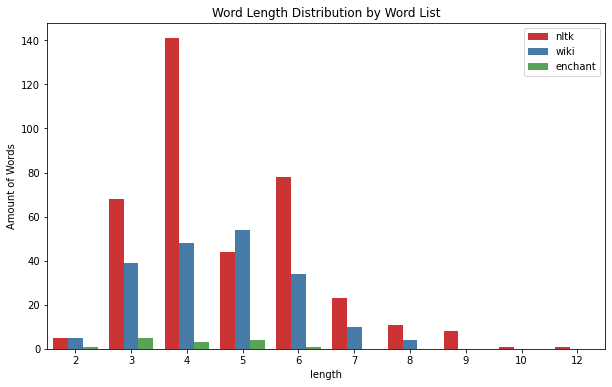

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(x="length", hue="source", data=data, palette="Set1")
ax.legend(loc='upper right')
ax.set_ylabel("Amount of Words")
ax.set_title("Word Length Distribution by Word List");

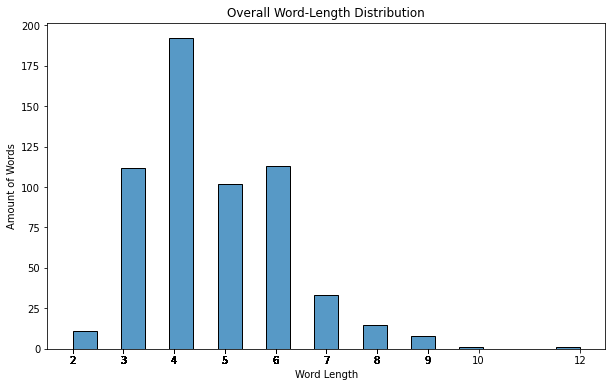

In [87]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=data, x='length')
ax.set_xlabel("Word Length")
ax.set_ylabel("Amount of Words")
ax.set_xticks(data['length'])
ax.set_title("Overall Word-Length Distribution");

### How many words of each length are in the data?

In [88]:
data['length'].value_counts()

4     192
6     113
3     112
5     102
7      33
8      15
2      11
9       8
10      1
12      1
Name: length, dtype: int64

Okay, we're loaded in the 3, 4, 5, 6 length range

A nerdy print out of the word-length percentage 

In [89]:
data['length'].value_counts(normalize=True)

4     0.326531
6     0.192177
3     0.190476
5     0.173469
7     0.056122
8     0.025510
2     0.018707
9     0.013605
10    0.001701
12    0.001701
Name: length, dtype: float64

## It would be cool if the data were normally distributed<br>but I have a hunch it isn't

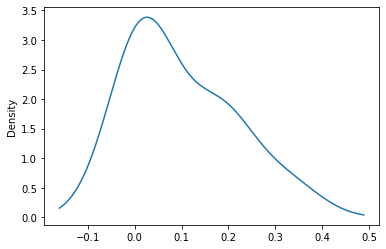

In [90]:
counts = data['length'].value_counts(normalize=True)
counts.plot.kde();

### Not normally distributed. It skews right. Okay<br>We'll see if there's something we can do with it a little later

## Another look at the distribution

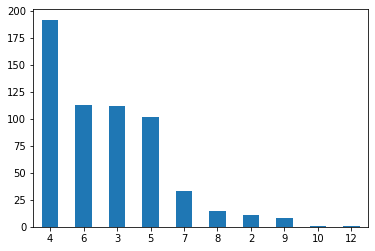

In [91]:
data['length'].value_counts().plot(kind='bar', rot=0);

# Let's reset, here for a minute

In [92]:
# Go here to find the wiki-100k.txt word list: https://gist.github.com/h3xx/1976236

with open('/Users/nathanwalter/jobsearch/Eye-Chart-Words/Data/large_words/wiki-100k.txt') as wiki: 
    wiki = list(wiki)

In [93]:
## Let's have a look at the Wiki list of 100,000 words

wiki[:30]

['#!comment: This is a list of the top 100,000 most frequently-used English words\n',
 '#!comment: according to Wiktionary.\n',
 '#!comment:\n',
 '#!comment: It was compiled in August 2005 and coalesced into a handy list for\n',
 '#!comment: use in John the Ripper.\n',
 '#!comment:\n',
 '#!comment:\n',
 '#!comment: Pull date: Sun Jan 15 22:03:54 2012 GMT\n',
 '#!comment:\n',
 '#!comment: Sources:\n',
 '#!comment:\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists#Top_English_words_lists\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/1-10000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/10001-20000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/20001-30000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/30001-40000\n',
 '#!comment: http://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2005/08/40001-50000\n',


### Looks like there is some extra stuff in there besides English words

In [94]:
import re
import numpy as np

reading in the wiki list to pandas DataFrame to start cleaning

In [95]:
wiki_df = pd.DataFrame(wiki, columns=['words'], dtype=str)
wiki_df.head()

,words
0,"#!comment: This is a list of the top 100,000 m..."
1,#!comment: according to Wiktionary.\n
2,#!comment:\n
3,#!comment: It was compiled in August 2005 and ...
4,#!comment: use in John the Ripper.\n


Print outs of the beginning and end of the DataFrame (technically a series)

In [96]:
wiki_df.tail()

,words
99923,ära\n
99924,égoïste\n
99925,AGE\n
99926,Ack\n
99927,Apennine


### Finding all the rows with those pesky hashtags and exclamation marks

In [97]:
print(wiki_df[wiki_df.words.str.contains(r'[@#&$%+-/*]')])

                                                   words
0      #!comment: This is a list of the top 100,000 m...
1                  #!comment: according to Wiktionary.\n
2                                           #!comment:\n
3      #!comment: It was compiled in August 2005 and ...
4                   #!comment: use in John the Ripper.\n
...                                                  ...
99625                         #!comment: 99701 - 99800\n
99685                                   compuserve.com\n
99726                         #!comment: 99801 - 99900\n
99827                        #!comment: 99901 - 100000\n
99881                                           left.'\n

[1544 rows x 1 columns]


## Dropping all rows that were found to have non-English characters

In [98]:
wiki_df.drop(wiki_df[wiki_df['words'].str.contains(r'[@#&$%+-/*]')].index, inplace=True)

wiki_df

,words
26,the\n
27,of\n
28,and\n
29,to\n
30,a\n
...,...
99923,ära\n
99924,égoïste\n
99925,AGE\n
99926,Ack\n


### There are some foreign words left, but our pattern of letters<br>from the eye chart will filter them out for us

Removing the new line symbols (\n) from our words 

In [99]:
wiki_df['words'] = wiki_df['words'].str.replace("\n", "")

In [100]:
wiki_df

,words
26,the
27,of
28,and
29,to
30,a
...,...
99923,ära
99924,égoïste
99925,AGE
99926,Ack


# Here's where we differ from above. We're getting rid of all the words that start with capital letters 

In [101]:
wiki_caps = wiki_df[~wiki_df['words'].str.contains('^[A-Z]+')]

In [102]:
# seeing if there's a difference from the printed out df from just above

wiki_caps

,words
26,the
27,of
28,and
29,to
30,a
...,...
99920,wateren
99921,wel
99922,withes
99923,ära


### There it is! Now we've got all words that don't start with a capital letter

In [103]:
print(f"""
Now we have a total of {len(wiki_caps)} rows in our new DataFrame, minus the 
capitol letters (Proper Nouns). This little maneuver got rid of {len(wiki_df) - len(wiki_caps)}
words from our cleaned most popular wiki words list. Let's see how that effects
our word list. I'm guessing it will contain a more coherent vocabular list, without
all the proper nouns.
""")


Now we have a total of 66055 rows in our new DataFrame, minus the 
capitol letters (Proper Nouns). This little maneuver got rid of 32329
words from our cleaned most popular wiki words list. Let's see how that effects
our word list. I'm guessing it will contain a more coherent vocabular list, without
all the proper nouns.



### We'll turn that Pandas DataFrame back into a list so we can<br>do some work with it

In [104]:
vals = wiki_caps['words']
wiki_caps_list = vals.tolist()

In [105]:
print(f"""Using our function from above, the one with the break statement,
we'll find all the words in our wiki list of {len(wiki_caps)} 
that contain only letters from the Eye Chart. Super cool, isn't it?""")

Using our function from above, the one with the break statement,
we'll find all the words in our wiki list of 66055 
that contain only letters from the Eye Chart. Super cool, isn't it?


In [106]:
pattern = 'epfdoctlz'
word_list = wiki_caps_list

wiki_caps_words = snellen_words(pattern, word_list)
print(wiki_caps_words[:400])
print(len(wiki_caps_words))

['of', 'to', 'de', 'do', 'et', 'old', 'le', 'too', 'people', 'def', 'left', 'off', 'tell', 'told', 'let', 'felt', 'tt', 'feet', 'ce', 'feel', 'fell', 'deep', 'cold', 'led', 'el', 'effect', 'elle', 'te', 'fld', 'cd', 'col', 'cette', 'foot', 'etc', 'food', 'top', 'fee', 'do', 'del', 'lot', 'people', 'op', 'poet', 'too', 'lo', 'fool', 'to', 'det', 'off', 'cool', 'of', 'feet', 'fled', 'fleet', 'pp', 'collected', 'odd', 'cf', 'cet', 'deed', 'coffee', 'tot', 'ed', 'feed', 'defect', 'elected', 'fed', 'flood', 'left', 'zoo', 'plot', 'foe', 'folded', 'effect', 'ete', 'oft', 'ze', 'old', 'ole', 'effected', 'pl', 'celle', 'collect', 'elect', 'pot', 'cell', 'cold', 'food', 'foot', 'effet', 'pool', 'ett', 'pole', 'todo', 'code', 'ftp', 'detected', 'tell', 'deze', 'tete', 'toe', 'fold', 'pet', 'ed', 'doe', 'flee', 'fell', 'delete', 'cote', 'detect', 'ft', 'tel', 'telle', 'pope', 'top', 'tool', 'deep', 'lot', 'felt', 'depot', 'ff', 'peep', 'foe', 'ef', 'flooded', 'peeped', 'dotted', 'peopled', 'doll'

In [107]:
print(f"""
There are {len(wiki_words) - len(wiki_caps_words)} fewer words in our cleaned up, 
non-proper-noun list of wiki words.
""")


There are 329 fewer words in our cleaned up, 
non-proper-noun list of wiki words.



In [108]:
wiki_caps_len = len(wiki_caps_words)
print(f""" There are {wiki_caps_len} words made soley from the letters of the Snellen Card 
in our list of 100,000 most popular wiki words.""")

 There are 442 words made soley from the letters of the Snellen Card 
in our list of 100,000 most popular wiki words.


## A look at the new, cleaner wiki words 

In [109]:
print(wiki_caps_words)

['of', 'to', 'de', 'do', 'et', 'old', 'le', 'too', 'people', 'def', 'left', 'off', 'tell', 'told', 'let', 'felt', 'tt', 'feet', 'ce', 'feel', 'fell', 'deep', 'cold', 'led', 'el', 'effect', 'elle', 'te', 'fld', 'cd', 'col', 'cette', 'foot', 'etc', 'food', 'top', 'fee', 'do', 'del', 'lot', 'people', 'op', 'poet', 'too', 'lo', 'fool', 'to', 'det', 'off', 'cool', 'of', 'feet', 'fled', 'fleet', 'pp', 'collected', 'odd', 'cf', 'cet', 'deed', 'coffee', 'tot', 'ed', 'feed', 'defect', 'elected', 'fed', 'flood', 'left', 'zoo', 'plot', 'foe', 'folded', 'effect', 'ete', 'oft', 'ze', 'old', 'ole', 'effected', 'pl', 'celle', 'collect', 'elect', 'pot', 'cell', 'cold', 'food', 'foot', 'effet', 'pool', 'ett', 'pole', 'todo', 'code', 'ftp', 'detected', 'tell', 'deze', 'tete', 'toe', 'fold', 'pet', 'ed', 'doe', 'flee', 'fell', 'delete', 'cote', 'detect', 'ft', 'tel', 'telle', 'pope', 'top', 'tool', 'deep', 'lot', 'felt', 'depot', 'ff', 'peep', 'foe', 'ef', 'flooded', 'peeped', 'dotted', 'peopled', 'doll'

# Now that we've got a cleaner list of wiki words<br>made from the Snellen Chart let's just make a DF<br>with the new wiki words list, the one without capitals

## We'll still compare the words to the NLTK list of real english words

### Let's see how the wiki caps Eye Chart words compare to the nltk eye chart words

In [110]:
# Find common elements of set and list
wiki_caps_set = set(wiki_caps_words)
intersection = wiki_caps_set.intersection(set(chart_words))

intersection_as_list3 = list(intersection)


print(intersection_as_list3)

['coffee', 'pop', 'loop', 'foot', 'coco', 'loo', 'pole', 'petted', 'topple', 'zoo', 'collected', 'toot', 'poll', 'tepee', 'delete', 'oft', 'toll', 'coo', 'polo', 'plotted', 'dolt', 'collect', 'leed', 'tole', 'poodle', 'toddle', 'dell', 'too', 'loft', 'fee', 'ted', 'dot', 'fold', 'eft', 'deflected', 'lo', 'doff', 'ooze', 'toe', 'colt', 'topped', 'tool', 'fed', 'ode', 'eel', 'pol', 'elle', 'toto', 'effect', 'tope', 'felt', 'tee', 'feed', 'pope', 'effete', 'doe', 'cope', 'deflect', 'flood', 'cede', 'coop', 'tell', 'fled', 'food', 'lode', 'fleet', 'fool', 'off', 'epee', 'fleece', 'coffle', 'code', 'zee', 'cop', 'dole', 'cool', 'lot', 'fet', 'flee', 'otto', 'top', 'dozed', 'eld', 'loco', 'let', 'led', 'odd', 'lee', 'clod', 'feel', 'pellet', 'coot', 'peeled', 'loll', 'de', 'plot', 'flooded', 'pelf', 'cold', 'fe', 'tot', 'loot', 'deft', 'pool', 'flot', 'elf', 'dotted', 'od', 'floe', 'pod', 'deed', 'cleft', 'footed', 'dee', 'dote', 'plod', 'tote', 'tete', 'fop', 'lof', 'zo', 'flop', 'ell', 'op

In [111]:
intersect3 = len(intersection_as_list2)
wiki_caps_length = len(wiki_caps_set)

In [112]:


print(f""" Thre are {len(intersection_as_list3)} words in common between 
the wiki snellen words and the nltk snellen words. This also means that there are 
{len(wiki_caps_set) - intersect3} words in the wiki eye chart words that aren't in the 
nltk eye chart words.""")

 Thre are 176 words in common between 
the wiki snellen words and the nltk snellen words. This also means that there are 
155 words in the wiki eye chart words that aren't in the 
nltk eye chart words.


## Here's the list of Wiki Caps Eye Chart words which are different<br>than anything we've seen so far

In [113]:
only_in_wiki_caps = list(set(wiki_caps_words) - set(chart_words))
print(only_in_wiki_caps)

['fete', 'olette', 'doet', 'zette', 'tel', 'popped', 'tolled', 'et', 'peopled', 'detto', 'le', 'ed', 'clept', 'ceded', 'lopped', 'folle', 'cel', 'deel', 'dopo', 'todo', 'fo', 'cd', 'feted', 'letto', 'cet', 'petto', 'colpo', 'foco', 'felled', 'ello', 'ff', 'fl', 'eo', 'edel', 'loopt', 'op', 'dezelfde', 'fel', 'ette', 'dood', 'clotted', 'zet', 'loc', 'effected', 'doled', 'colle', 'ofte', 'poete', 'ef', 'cf', 'telle', 'oop', 'cc', 'pel', 'ez', 'dolce', 'oppe', 'doel', 'ple', 'ftp', 'pt', 'teepee', 'fleete', 'edele', 'delle', 'peeped', 'ete', 'telled', 'foole', 'pelted', 'cp', 'zelf', 'ep', 'decl', 'looted', 'popolo', 'ze', 'oedd', 'del', 'll', 'ecco', 'telco', 'effet', 'oot', 'eet', 'lette', 'ol', 'leetle', 'depleted', 'elected', 'pelle', 'oo', 'pl', 'fol', 'cle', 'dle', 'eloped', 'olelo', 'oz', 'coelo', 'doot', 'todt', 'feet', 'dede', 'edle', 'zelfde', 'cette', 'flotte', 'zzzzz', 'def', 'cooled', 'fld', 'looped', 'olet', 'opp', 'doode', 'ft', 'efecto', 'cooed', 'ole', 'lec', 'fooled', 'f

# Making the Wiki Caps Eye DataFrame<br>Here we can work with just one word list<br>we'll see if this makes things better or worse

In [114]:
lists = {'nltk' : chart_words, 'wiki' : only_in_wiki_caps}

data_caps = pd.DataFrame([(k, e, len(e)) for k, l in lists.items() for e in l],
                   columns = ['source', 'word', 'length'])

### Having a look at the top of the DataFrame

In [115]:
data_caps.head()

,source,word,length
0,nltk,ce,2
1,nltk,cede,4
2,nltk,cee,3
3,nltk,cell,4
4,nltk,celled,6


### And let's see if the wiki eye chart words were added to the bottom<br> of the DataFrame and labeled under the source column correctly

In [116]:
data_caps.tail()

,source,word,length
571,wiki,peece,5
572,wiki,deze,4
573,wiki,foll,4
574,wiki,tle,3
575,wiki,feete,5


## Looks good. The NLTK Eye Chart words are at the top and the Wiki Caps Test Card words are at the bottom.
### The source column tells us where the words came from 

In [117]:
print(f"""We now have {len(data_caps)} words from two differen sources. 
All of the words are comprised soley of letters from the Snellen Eye Chart!""")

We now have 576 words from two differen sources. 
All of the words are comprised soley of letters from the Snellen Eye Chart!


# I think we can safely remove any rows with words<br>that have no vowels

### isolating the rows without vowels

In [118]:
no_vowels_caps = (data_caps[data_caps['word'].str.count('(?i)[aeiou]') < 1])
no_vowels_list = no_vowels_caps.values.tolist()
print(no_vowels_caps)

#print(wiki_df[wiki_df.words.str.contains(r'[@#&$%+-/*]')])
#wiki_df.drop(wiki_df[wiki_df['words'].str.contains(r'[@#&$%+-/*]')].index, inplace=True)

    source   word  length
425   wiki     cd       2
434   wiki     ff       2
435   wiki     fl       2
453   wiki     cf       2
456   wiki     cc       2
463   wiki    ftp       3
464   wiki     pt       2
474   wiki     cp       2
483   wiki     ll       2
496   wiki     pl       2
512   wiki  zzzzz       5
515   wiki    fld       3
520   wiki     ft       2
540   wiki     tt       2
541   wiki     pp       2


In [119]:
print(f""" There are {len(no_vowels_list)} words with no vowels """)

 There are 15 words with no vowels 


### Dropping those rows

In [120]:
data_caps.drop(data_caps[data_caps['word'].str.count('(?i)[aeiou]') < 1].index, inplace=True)

In [121]:
data_caps = data_caps.reset_index(drop=True)

In [122]:
print(f"""After dropping the rows with words 
that have no vowels we're left with {len(data_caps)} rows 
in our DataFrame""")

After dropping the rows with words 
that have no vowels we're left with 561 rows 
in our DataFrame


some nltk examples

In [123]:
data_caps.head()

,source,word,length
0,nltk,ce,2
1,nltk,cede,4
2,nltk,cee,3
3,nltk,cell,4
4,nltk,celled,6


some wiki caps words

In [124]:
data_caps.tail()

,source,word,length
556,wiki,peece,5
557,wiki,deze,4
558,wiki,foll,4
559,wiki,tle,3
560,wiki,feete,5


In [125]:
len(data_caps)

561

#### Getting a look at all the two-letter words

In [126]:
caps_two = data_caps.loc[data_caps['length'] == 2] #153, 204, 254, 401, 409, 443, 561

#uncomment below to see records with 2-lettered words
caps_two

,source,word,length
0,nltk,ce,2
79,nltk,de,2
101,nltk,do,2
136,nltk,el,2
151,nltk,fe,2
206,nltk,lo,2
233,nltk,od,2
238,nltk,oe,2
239,nltk,of,2
285,nltk,po,2


Getting rid of all the non-english two-letter words

In [127]:
rows = [519, 500, 490, 443, 424, 417, 429] 

data_caps.drop(data_caps.index[rows], inplace=True,)

In [129]:
print(f"""
So after getting rid of all the nonsense two-letter words, our 
dataframe has {len(data_caps)} rows of wiki words and nltk words 
made from the letters of the Eye Chart
""")


So after getting rid of all the nonsense two-letter words, our 
dataframe has 554 rows of wiki words and nltk words 
made from the letters of the Eye Chart



A look at the first nltk words in the df

In [130]:
data_caps.head(10)

,source,word,length
0,nltk,ce,2
1,nltk,cede,4
2,nltk,cee,3
3,nltk,cell,4
4,nltk,celled,6
5,nltk,cello,5
6,nltk,celt,4
7,nltk,cep,3
8,nltk,cepe,4
9,nltk,cled,4


and a look at the wiki words in the df

In [131]:
data_caps.tail(10)

,source,word,length
551,wiki,colde,5
552,wiki,cooped,6
553,wiki,doo,3
554,wiki,toppled,7
555,wiki,olleet,6
556,wiki,peece,5
557,wiki,deze,4
558,wiki,foll,4
559,wiki,tle,3
560,wiki,feete,5


# Let's see which words from our new wiki list are in nltk

In [138]:
wiki_nltk_common = data_caps[data_caps['word'].duplicated()].drop('source', axis=1)

In [137]:
wiki_nltk_common

,word,length
388,cold,4
389,deep,4
390,do,2
391,effect,6
392,fold,4
393,food,4
394,foot,4
395,left,4
396,let,3
397,of,2


## From 100,000 words to 16 

In [147]:
print(f"""
There are {len(wiki_nltk_common)} words in our refined wiki list of 100,000
words that are in nltk. All sixteen are real-life words, 
made soley from the letters of the Snellen Test Card.
""")


There are 16 words in our refined wiki list of 100,000
words that are in nltk. All sixteen are real-life words, 
made soley from the letters of the Snellen Test Card.



In [152]:
wiki_caps_list = wiki_nltk_common['word'].to_list()

 Print out of the wiki_caps words from nltk.<br>Let's have them be capitalized since that's<br>how they appear on the Test Card

In [160]:
for number, letter in enumerate(wiki_caps_list, start = 1):
    print(number, letter.upper())


1 COLD
2 DEEP
3 DO
4 EFFECT
5 FOLD
6 FOOD
7 FOOT
8 LEFT
9 LET
10 OF
11 OFF
12 OLD
13 POT
14 TO
15 TOE
16 TOP
